In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from digicomm import Pll, Dds, Integrator, LoopFilter

In [2]:
rng = np.random.default_rng()
t, Ts = np.linspace(-1,1,201,retstep=True)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1 * np.sin(2*np.pi*1.25*t + 1) + 0.18 * np.cos(2*np.pi*3.85*t))
xn = x + rng.standard_normal(len(t)) * 0.08

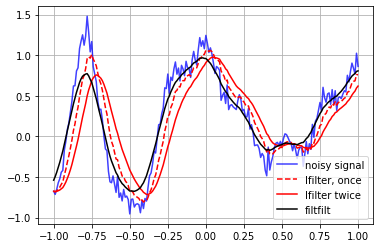

In [3]:
#b,a = signal.butter(3,0.05)
wn = 2*np.pi*2 # [rad]
K = 10 # [rad/V]
zeta = 1/np.sqrt(2) # damping factor
tau1 = K / wn**2
tau2 = 2*zeta/wn - 1/K
b = np.array([tau2,1])
a = np.array([tau1,1])

#b,a = signal.bilinear(b,a,fs=1/Ts)
b,a = signal.firls(21)
zi = signal.lfilter_zi(b,a)
z,zf = signal.lfilter(b,a,xn,zi=zi*xn[0])
z2,zf = signal.lfilter(b,a,z,zi=zi*xn[0])
y = signal.filtfilt(b,a,xn)

plt.figure()
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t,z,'r--')
plt.plot(t,z2,'r')
plt.plot(t,y,'k')
plt.legend(['noisy signal','lfilter, once','lfilter twice','filtfilt'])
plt.grid(True)
plt.show()

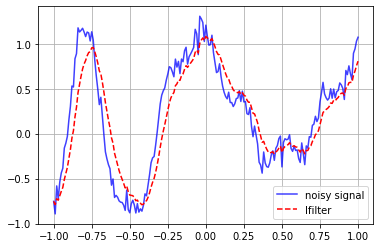

In [4]:


rng = np.random.default_rng()
t, Ts = np.linspace(-1,1,201,retstep=True)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1 * np.sin(2*np.pi*1.25*t + 1) + 0.18 * np.cos(2*np.pi*3.85*t))
xn = x + rng.standard_normal(len(t)) * 0.08

wn = 2 * np.pi * 2
K = 10
zeta = 1/np.sqrt(2)
xi = xn[0]
lf = LoopFilter(wn,K,zeta,Ts,xi)

z = np.zeros(xn.shape)
for i in range(0,len(z)):
    z[i] = lf.update(xn[i])

plt.figure()
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t,z,'r--')
plt.legend(['noisy signal','lfilter'])
plt.grid(True)
plt.show()

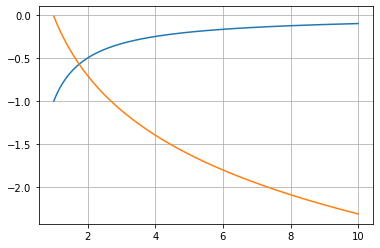

In [5]:


t, Ts = np.linspace(1,10,num=600,retstep=Ts)
v = -1 / t
K = 1
i = Integrator(K, Ts=Ts)

phi = np.zeros(v.shape)
for j in range(0,len(v)):
    phi[j] = i.integrate(v[j])

plt.figure()
plt.plot(t, v)
plt.plot(t, phi)
plt.grid()
plt.show()

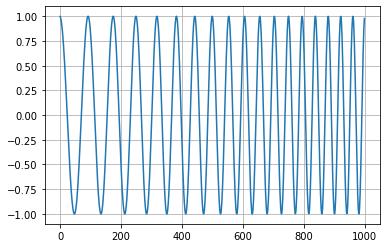

In [6]:
stop_time = 1000
Bn = 0.002
Ts = 1
t = np.arange(0,stop_time,step=Ts)
K0 = 1
Kp = 1
K = 4 * Bn * Ts / K0 / Kp / (2 * Bn * Ts + 1)

Omega0 = 0.01 # cycles/sample
src_freq = Omega0 # cycles/sample
dds_freq = Omega0 # cycles/sample
theta = np.pi/2 # radians



dds = Dds(dds_freq, K0, Ts=Ts)
z = dds.update(np.cumsum(0.0001*np.ones((len(t),))))

plt.figure()
plt.plot(t,np.real(z))
plt.grid()
plt.show()

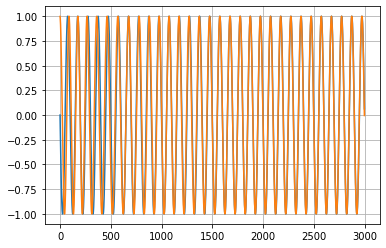

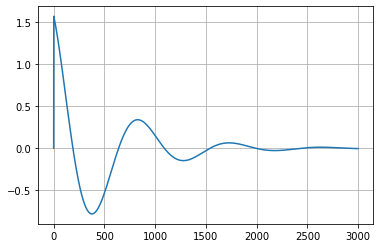

In [19]:
stop_time = 3000
Bn = 0.02
Ts = 1
t = np.arange(0,stop_time,step=Ts)
K0 = 1
Kp = .01
K = 4 * Bn * Ts / K0 / Kp / (2 * Bn * Ts + 1)

Omega0 = 0.01 # cycles/sample
src_freq = Omega0 # cycles/sample
dds_freq = Omega0 # cycles/sample
theta = np.pi/2 # radians

pll = Pll(dds_freq, Bn, K, K0, Ts=Ts, zeta=1/np.sqrt(2))

x = np.exp(1j * (2*np.pi*src_freq * t + theta) ) # input signal
y,e = pll.update(x, reterror=True)

plt.figure()
plt.plot(t,np.real(x))
plt.plot(t,np.real(y))
plt.grid()
plt.show()

plt.figure()
plt.plot(t,e)
plt.grid()
plt.show()